In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv("haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
print(data.shape)

(306, 4)


There are about 306 datapoints and 3 Features and 1 dependent variable

In [4]:
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


the different Features names "age","year","nodes"
the dependent variable is "status"

In [5]:
data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

There are two different classes namely "1" and "2"
class "1" has data points of about 225
class "2" has data points of about 81

In [6]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


There are no null values in our data.
class "1" denotes "survived"
class "2" denotes "dead"

<h1>Scatter Plot</h1>


Text(0.5, 1.0, 'Age vs Year')

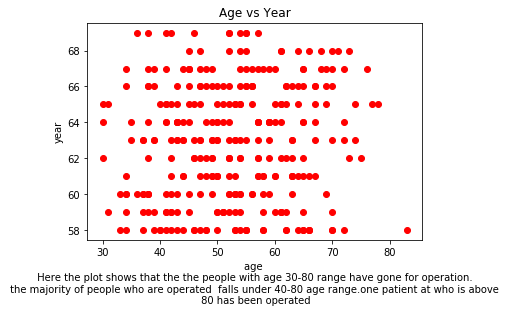

In [8]:
plt.scatter(data["age"],data["year"],color = "red")
plt.xlabel("age \n Here the plot shows that the the people with age 30-80 range have gone for operation. \n the majority of people who are operated  falls under 40-80 age range.one patient at who is above \n 80 has been operated")
plt.ylabel("year")
plt.title("Age vs Year")


<h6> </h6>

Text(0.5, 1.0, 'A positive axillary lymph node is a lymph node to which cancer has spread. \n The plot show that more amount datapoints plotted at node=0. This shows that most people has 0 nodes')

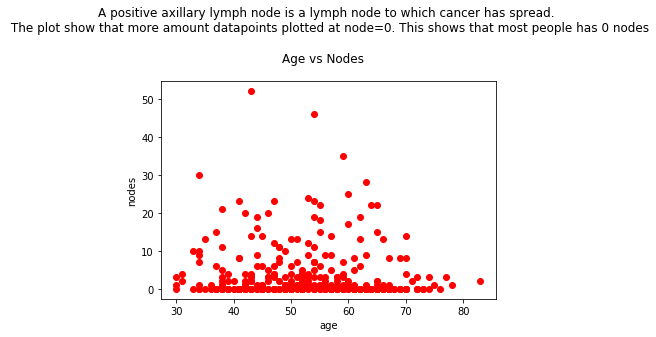

In [9]:
plt.scatter(data["age"],data["nodes"],color = "red")
plt.xlabel("age")
plt.ylabel("nodes")
plt.suptitle("Age vs Nodes")
plt.title("A positive axillary lymph node is a lymph node to which cancer has spread. \n The plot show that more amount datapoints plotted at node=0. This shows that most people has 0 nodes",loc="center",pad=50.0)

Text(0.5, 0.98, 'This plot concludes that the large number of operations are during 1961-1965')

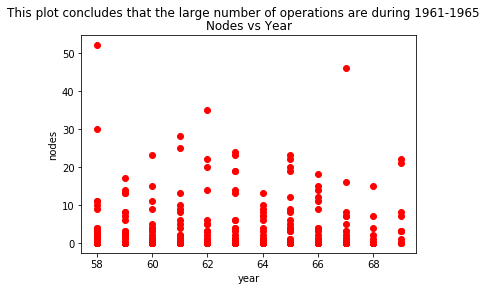

In [10]:
plt.scatter(data["year"],data["nodes"],color="red")
plt.xlabel("year")
plt.ylabel("nodes")
plt.title("Nodes vs Year")
plt.suptitle("This plot concludes that the large number of operations are during 1961-1965")

<h1>Pair Plot<h1>

Text(0.5, 0.98, 'This does not provide much insights as all the points are overlapping')

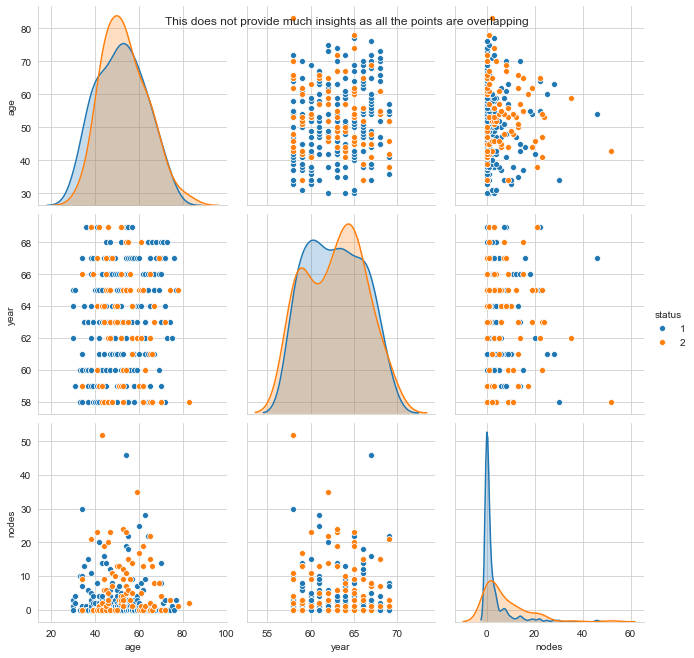

In [11]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="status",height=3)
plt.suptitle("This does not provide much insights as all the points are overlapping" )

<h1>Histogram, PDF, CDF</h1>

In [12]:
survived = data[data["status"] == 1]
dead = data[data["status"] == 2]


Text(0.5, 1, 'This shows most of the people who have 0 axilary nodes are likely to survive.\n So we can consider nodes as a decision factor')

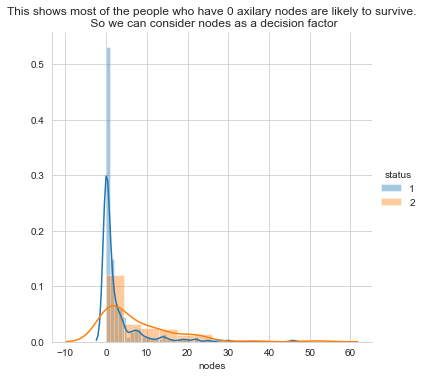

In [13]:
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"nodes").add_legend()
plt.title("This shows most of the people who have 0 axilary nodes are likely to survive.\n So we can consider nodes as a decision factor")

Text(0.5, 1, 'This plot shows that the most of the patient who have under gone operation  between the \n year 60.0 to 62.5 have died.As it is mostly overlapping we cannot consider this as deciding factor.')

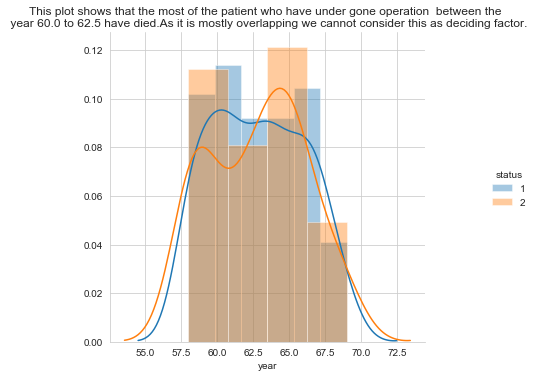

In [14]:
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"year").add_legend()
plt.title("This plot shows that the most of the patient who have under gone operation  between the \n year 60.0 to 62.5 have died.As it is mostly overlapping we cannot consider this as deciding factor.")

Text(0.5, 1, 'The age could not be decision factor  as it is also overlapping ')

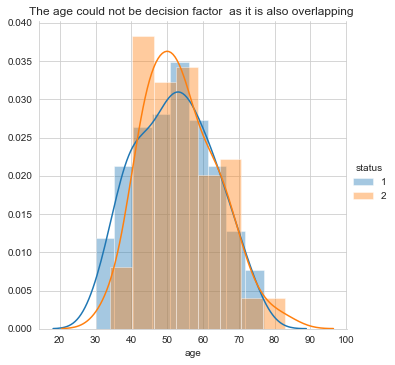

In [15]:
sns.FacetGrid(data,hue="status",height=5).map(sns.distplot,"age").add_legend()
plt.title("The age could not be decision factor  as it is also overlapping ")

<h6>cdf</h6>

Text(0.5, 1.0, 'cdf for whole data')

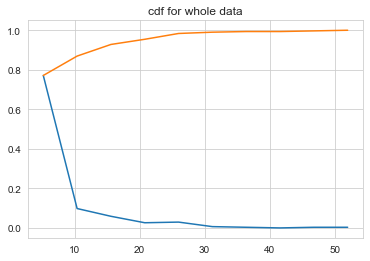

In [16]:
#as we have found that nodes features can be used for classfification let's look at the cdf for both the calsses
counts,binedges = np.histogram(data["nodes"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)
plt.title("cdf for whole data")

Text(0.5, 1.0, 'cdf for survived persons')

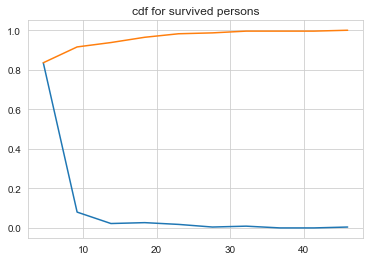

In [17]:
#lets look at cdf for survived persons alone
counts,binedges = np.histogram(survived["nodes"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)
plt.title("cdf for survived persons")

Text(0.5, 1.0, 'cdf for dead persons')

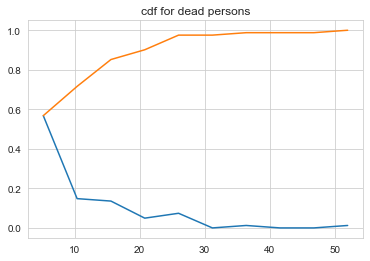

In [18]:
counts,binedges = np.histogram(dead["nodes"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)
plt.title("cdf for dead persons")

<h6>Box Plot</h6>


Text(0.5, 1.0, 'This plot also shows that the people with zero nodes are likely to survive')

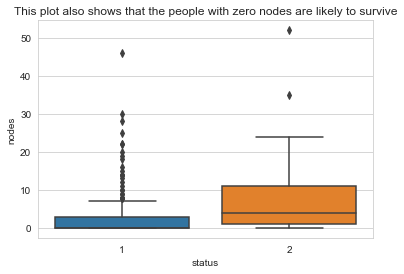

In [19]:
sns.boxplot(x = "status",y="nodes",data = data)
plt.title("This plot also shows that the people with zero nodes are likely to survive")

Text(0.5, 1.0, 'plotting year with respect to status')

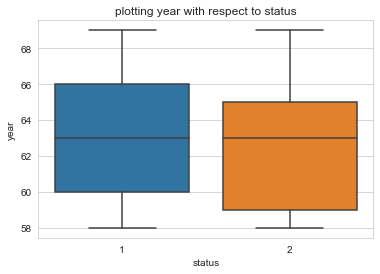

In [20]:
sns.boxplot(x = "status",y="year",data = data)
plt.title("plotting year with respect to status")

Text(0.5, 1.0, 'plotting age with respect to status')

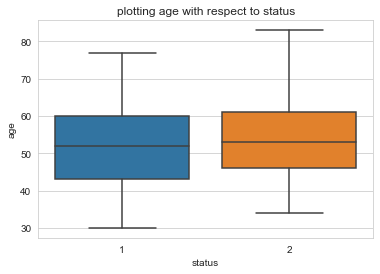

In [21]:
sns.boxplot(x = "status",y="age",data = data)
plt.title("plotting age with respect to status")

Text(0.5, 1.0, 'Violin plots of age')

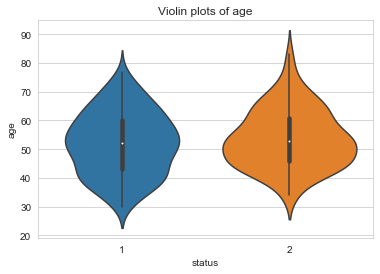

In [22]:
sns.violinplot(x='status',y='age',data=data,size=2)
plt.title("Violin plots of age with status")

Text(0.5, 1.0, 'Violin plots of year with status')

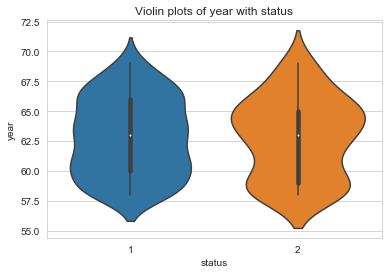

In [42]:
sns.violinplot(x='status',y='year',data=data,size=2)
plt.title("Violin plots of year with status")

Text(0.5, 0.98, 'From this plot it is visible that most of suvived patients had o number of nodes')

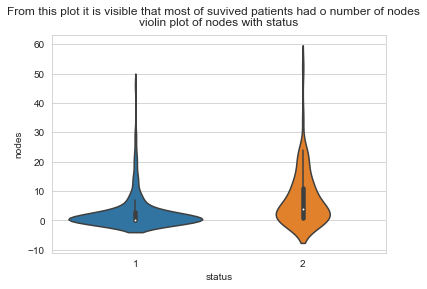

In [45]:
sns.violinplot(x='status',y='nodes',data=data,size=2)
plt.title("violin plot of nodes with status",pad=10.0)
plt.suptitle("From this plot it is visible that most of suvived patients had o number of nodes")

Text(0.5, 49.99999999999995, '\n \n \n This shows that the people with age group of 60 - 66 are mostly affected')

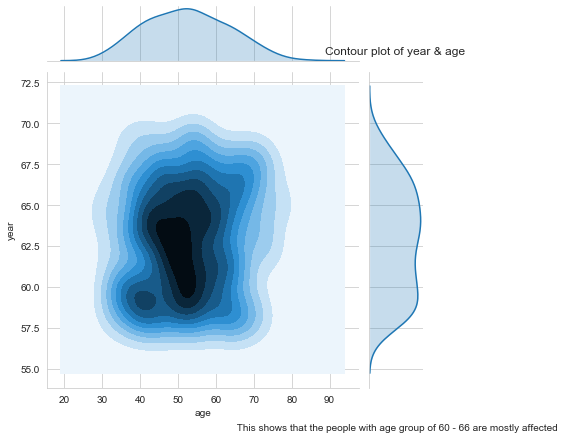

In [36]:
sns.jointplot(x="age", y="year", data=data, kind="kde")
plt.title("Contour plot of year & age \n")
plt.xlabel("\n \n \n This shows that the people with age group of 60 - 66 are mostly affected")


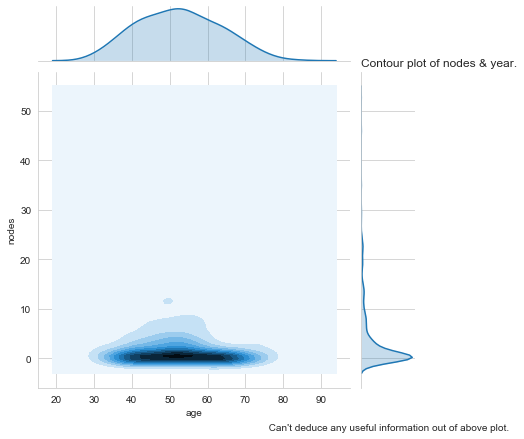

In [33]:
sns.jointplot(x="age", y="nodes", data=data, kind="kde");
plt.title("Contour plot of nodes & year.", loc='left')
plt.xlabel("\n \n \n Can't deduce any useful information out of above plot.")
plt.show()

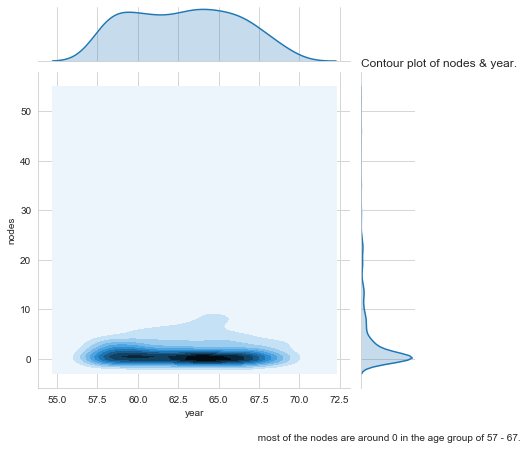

In [32]:
sns.jointplot(x="year", y="nodes", data=data, kind="kde");
plt.title("Contour plot of nodes & year.", loc='left')
plt.xlabel("\n \n \n \n most of the nodes are around 0 in the age group of 57 - 67.")
plt.show()

OBSERVATIONS:
    1. from the above plots and analysis,we come to an conclusion that no feature has a great impact on status for classification.
    2. But in case of nodes when compared to year and age it is observed that nodes has some contribution towards status.
    3. the people with 0 nodes has almost survived.
    4. the nodes feature will act as some factor towards classifying the survival of the patients.